## Food 101 Dataset from kaggle

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

In [2]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-02-25 01:29:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 173.194.192.128, 172.217.219.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   255MB/s    in 1.9s    

2023-02-25 01:29:45 (255 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [7]:
import os

for path, folder, filename in os.walk('10_food_classes_all_data'):
  print(f"There are {len(folder)} directories and {len(filename)} images in '{path}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

In [8]:
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [10]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
classs_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(classs_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [13]:
import random
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+ "/" +target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


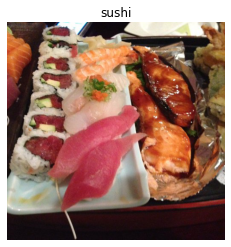

In [18]:
img = view_random_image(target_dir = train_dir, target_class= random.choice(classs_names))

## Preprocess the data for modelling

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)

test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir, 
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               color_mode = 'rgb',
                                               class_mode = 'categorical'   
                                              )

test_data = train_datagen.flow_from_directory(test_dir, 
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               color_mode = 'rgb',
                                               class_mode = 'categorical'   
                                              )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Create a model (Base Line)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [41]:
model_1 = Sequential([
    Conv2D(10, 3,  activation = 'relu', input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3,  activation = 'relu'),
    Conv2D(10, 3,  activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])



model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data, 
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 228ms/step - loss: 2.2307 - accuracy: 0.1621 - val_loss: 2.0487 - val_accuracy: 0.2572
Epoch 2/5
235/235 [==============================] - 45s 193ms/step - loss: 2.0078 - accuracy: 0.2828 - val_loss: 1.9680 - val_accuracy: 0.3056
Epoch 3/5
235/235 [==============================] - 59s 249ms/step - loss: 1.8487 - accuracy: 0.3564 - val_loss: 1.8963 - val_accuracy: 0.3344
Epoch 4/5
235/235 [==============================] - 63s 268ms/step - loss: 1.4838 - accuracy: 0.4953 - val_loss: 1.9919 - val_accuracy: 0.3388
Epoch 5/5
235/235 [==============================] - 67s 286ms/step - loss: 0.8781 - accuracy: 0.7068 - val_loss: 2.5130 - val_accuracy: 0.3092


### Evaluate the model

In [42]:
model_1.evaluate(test_data)

79/79 [==============================] - 12s 148ms/step - loss: 2.5130 - accuracy: 0.3092


[2.5129928588867188, 0.3091999888420105]

In [43]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

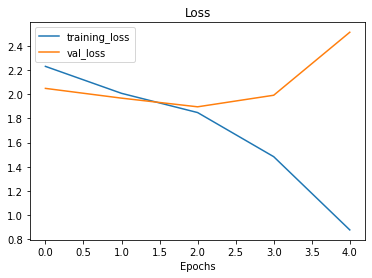

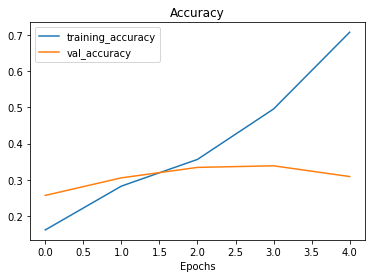

In [44]:
plot_loss_curves(history_1)

### Adjust  Model (Hyperparameters)

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

In [48]:
model_2 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3), activation ='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation ='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


In [49]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)              

In [50]:
history_2 = model_2.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 207ms/step - loss: 2.1549 - accuracy: 0.2407 - val_loss: 1.9385 - val_accuracy: 0.3256
Epoch 2/5
235/235 [==============================] - 49s 208ms/step - loss: 1.7750 - accuracy: 0.3953 - val_loss: 1.9281 - val_accuracy: 0.3440
Epoch 3/5
235/235 [==============================] - 47s 199ms/step - loss: 1.3482 - accuracy: 0.5591 - val_loss: 1.9890 - val_accuracy: 0.3372
Epoch 4/5
235/235 [==============================] - 58s 248ms/step - loss: 0.8222 - accuracy: 0.7443 - val_loss: 2.2990 - val_accuracy: 0.3312
Epoch 5/5
235/235 [==============================] - 48s 205ms/step - loss: 0.4310 - accuracy: 0.8771 - val_loss: 2.7143 - val_accuracy: 0.3092


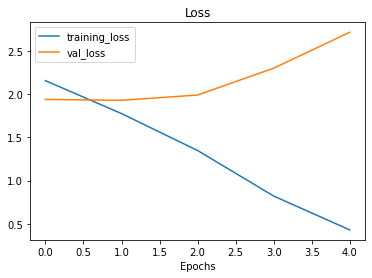

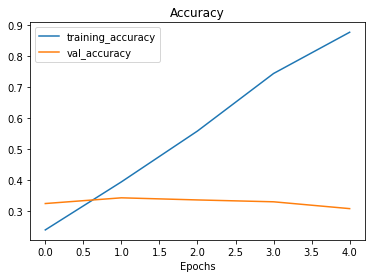

In [51]:
plot_loss_curves(history_2)

Improve model using data augumentation

In [52]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [53]:
model_3 = tf.keras.models.clone_model(model_1)

model_3.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [54]:
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_53 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_55 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [58]:
history_3 = model_3.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps =len(test_data))

Epoch 1/5
235/235 [==============================] - 147s 626ms/step - loss: 1.9588 - accuracy: 0.3119 - val_loss: 1.8044 - val_accuracy: 0.3724
Epoch 2/5
235/235 [==============================] - 124s 528ms/step - loss: 1.9184 - accuracy: 0.3353 - val_loss: 1.8900 - val_accuracy: 0.3456
Epoch 3/5
235/235 [==============================] - 125s 530ms/step - loss: 1.8811 - accuracy: 0.3463 - val_loss: 1.7188 - val_accuracy: 0.4204
Epoch 4/5
235/235 [==============================] - 123s 523ms/step - loss: 1.8545 - accuracy: 0.3677 - val_loss: 1.7368 - val_accuracy: 0.4080
Epoch 5/5
235/235 [==============================] - 124s 527ms/step - loss: 1.8310 - accuracy: 0.3708 - val_loss: 1.7129 - val_accuracy: 0.4200


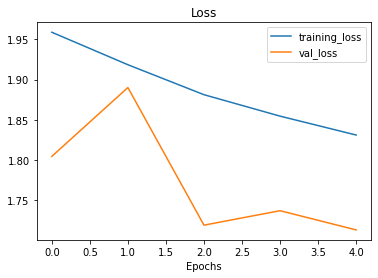

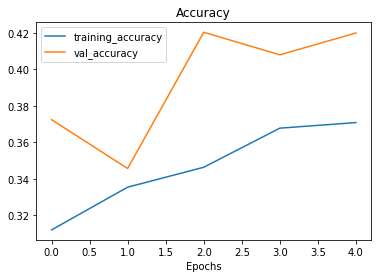

In [59]:
plot_loss_curves(history_3)

In [60]:
model_1.evaluate(test_data)

79/79 [==============================] - 12s 152ms/step - loss: 2.5130 - accuracy: 0.3092


[2.512993335723877, 0.3091999888420105]

In [61]:
model_3.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 1.7129 - accuracy: 0.4200


[1.7128973007202148, 0.41999998688697815]

### Making Predictions

In [65]:
classs_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [66]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [67]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [68]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 308ms/step


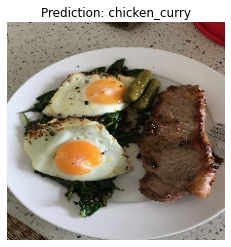

In [70]:
# Make a prediction using model_11
pred_and_plot(model=model_3, 
              filename="03-steak.jpeg", 
              class_names=classs_names)

1/1 [==============================] - 0s 38ms/step


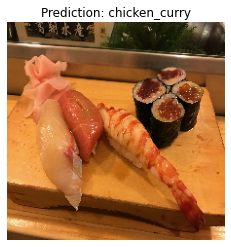

In [73]:
pred_and_plot(model_3, "03-sushi.jpeg", classs_names)

1/1 [==============================] - 0s 20ms/step


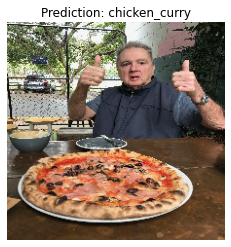

In [74]:
pred_and_plot(model_3, "03-pizza-dad.jpeg", classs_names)

### Saving our model

In [75]:
model_3.save('saved_trained_model_3_food_vision')

In [77]:
from google.colab import files

In [78]:
!zip -r /content/saved_trained_model_3_food_vision.zip /content/saved_trained_model_3_food_vision

  adding: content/saved_trained_model_3_food_vision/ (stored 0%)
  adding: content/saved_trained_model_3_food_vision/keras_metadata.pb (deflated 91%)
  adding: content/saved_trained_model_3_food_vision/variables/ (stored 0%)
  adding: content/saved_trained_model_3_food_vision/variables/variables.index (deflated 65%)
  adding: content/saved_trained_model_3_food_vision/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/saved_trained_model_3_food_vision/saved_model.pb (deflated 89%)
  adding: content/saved_trained_model_3_food_vision/assets/ (stored 0%)
  adding: content/saved_trained_model_3_food_vision/fingerprint.pb (stored 0%)


In [79]:
files.download('saved_trained_model_3_food_vision.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>